# Images

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## Charger une image

Pour charger des images nous importons la fonction `imread`.

In [7]:
from matplotlib.image import imread

La fonction `imread()` peut importer deux types d'images

- couleur (RGB)
- noir et blancs (0..255)

Voici une image en couleur

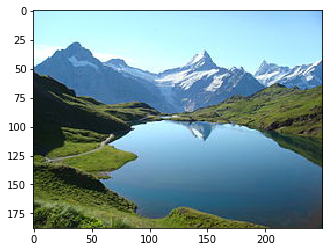

In [98]:
img = imread('img/Bachalpsee.jpg')
plt.imshow(img);

Voici les dimensions de la matrice:
- 188 pixelx en hauteur
- 250 pixels en largeur
- 3 octets pour définir une couleur

In [41]:
img.shape

(188, 250, 3)

Voici le pixel à la position (25, 25). C'est dans la région ciel et de couleur cyan. Les composant bleu et vert sont au maximum.

In [44]:
img[25, 25]

array([206, 255, 255], dtype=uint8)

## Indexer des pixels

Nous pouvons extraire une tranche d'une image. Dans une matrice, le premier indice est l'axe vertical (y) et le deuxième indice l'axe horizontal (x).

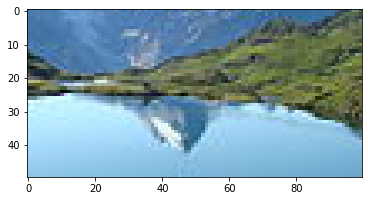

In [107]:
plt.imshow(img[70:120, 100:200]);

## Annoter l'image

Nous pouvons superposer du text à une image.

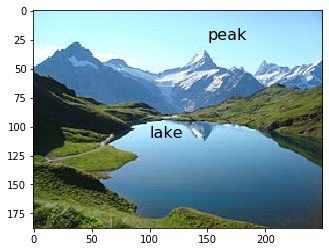

In [47]:
plt.imshow(img);
plt.text(150, 25, 'peak', fontsize=16)
plt.text(100, 110, 'lake', fontsize=16);

## Afficher sans les axes

La fonction `axis('off')` permet de ne pas afficher les axes.

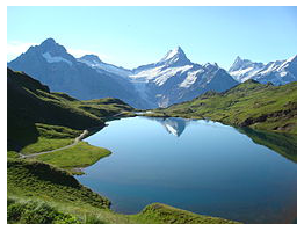

In [49]:
plt.imshow(img)
plt.axis('off');

## Noir et blancs

Les images noir-et-blancs sont affiché avec une **colormap**.

In [8]:
img = imread('img/lake.jpg')

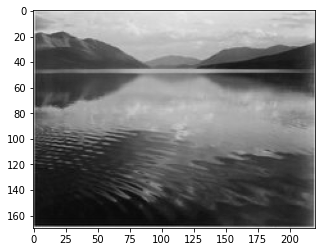

In [9]:
plt.imshow(img, cmap='gray');

L'image est de taille 220x170 et du type `ndarray`.

In [71]:
img.shape

(170, 220)

In [75]:
type(img)

numpy.ndarray

## Color maps
Les images en noir et blancs (niveaux de gris) peuvent être coloriés avec des colormaps.

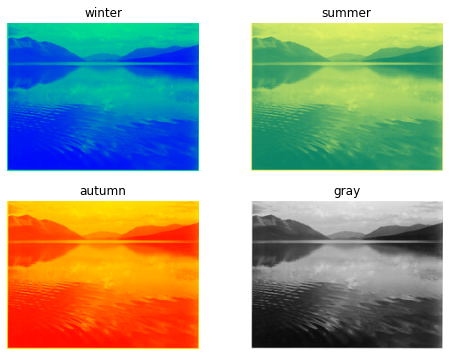

In [12]:
maps = ['winter', 'summer', 'autumn', 'gray']

plt.subplots(figsize=(8, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(img, cmap=maps[i])
    plt.axis('off')
    plt.title(maps[i])

## La barre des couleurs

La fonction `colorbar()` affiche une barre de couleur qui indique la correspondance des valeurs numérique et des couleurs.

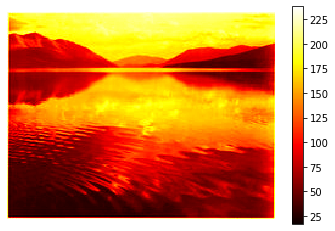

In [83]:
    plt.imshow(img, cmap='hot')
    plt.axis('off')
    plt.colorbar();

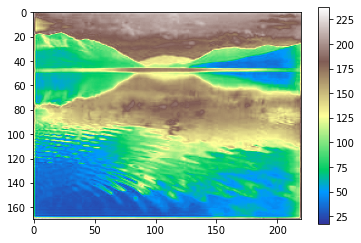

In [15]:
plt.imshow(img, cmap='terrain')
plt.colorbar();

## Inverser

Pour inverser l'image nous utilison l'option `origin`.

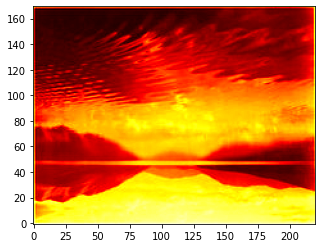

In [14]:
plt.imshow(img, origin='lower', cmap='hot');

## Juxtaposer

Avec la commande `hstack` (horizontal stack) nous pouvons juxtaposer des images.

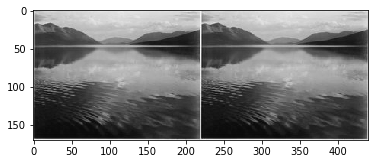

In [94]:
a = np.hstack([img, img])
plt.imshow(a);

## Superposer

Avec la commande `vstack` (horizontal stack) nous pouvons superposer des images.

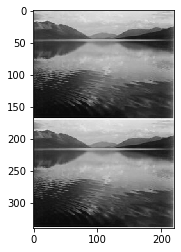

In [95]:
a = np.vstack([img, img])
plt.imshow(a);

## Mandelbrot

Pour terminer calculons un fractal de Mandelbrot.

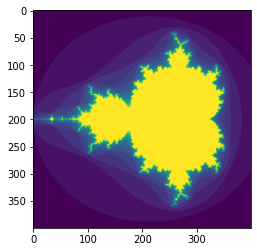

In [18]:
def mandelbrot(h, w, maxit=20):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x + y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime

plt.imshow(mandelbrot(400, 400));